# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Leer los archivos de datos usando la función pd.read_csv usando los parámetros para su correcta lectura y posterior verificación de la infomación.

In [1]:
import pandas as pd

In [2]:
# leer conjuntos de datos en los DataFrames

In [3]:
instacart = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
instacart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
products = pd.read_csv('/datasets/products.csv', sep=';')
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
order_products.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [6]:
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
departments = pd.read_csv('/datasets/departments.csv', sep=';')
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
Pudimos ver que los data frames estabana separados por ';', para eso tuvimos que usar el parámetro sep=';', además al llamar el método info() nos damos cuenta que hay columnas con datos ausentes.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).

- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

1. Para corregir los tipos de datos usamos dtypes y corroboramos si el tipo descrito concuerda con los datos que conforman las columnas.
2. Para poder identificar y completar los valores ausentes primero usamos el método isna() y luego fillna().
3. Para identificar los valores duplicados usamos el método .duplicated() y luego drop.duplicates()

## Eliminar los valores duplicados 

### `orders` data frame

In [8]:
print(instacart.dtypes)
instacart[instacart.duplicated()]


order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [9]:
instacart_1=instacart.query('order_dow == 3 & order_hour_of_day==2')
instacart_1

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0



Podemos ver que hay un fallo en el sistema ese día a esa hora

In [10]:
# Elimina los pedidos duplicados
instacart_sin_duplicados = instacart.drop_duplicates()

In [11]:
# Vuelve a verificar si hay filas duplicadas
instacart_sin_duplicados.duplicated().sum()

0

In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
instacart_sin_duplicados['order_id'].duplicated().sum()

0

Encontramos 15 duplicados generados por un presunto error del sistema usando el método drop_duplicates()

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(products.dtypes)
print()
print('Número de duplicados: ' + str(products.duplicated().sum()))
products.head()


product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

Número de duplicados: 0


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
products['department_id'].duplicated().sum()

49673

In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()
products['product_name'].duplicated().sum()

1361

In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
products_sin_faltantes = products['product_name'].dropna()
products_sin_faltantes.duplicated().sum()

104

Existen 49673 duplicados de ID de departamentos no faltantes

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(departments.dtypes)
print()
print('Número de duplicados: ' + str(departments.duplicated().sum()))
departments.head()

department_id     int64
department       object
dtype: object

Número de duplicados: 0


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
departments['department_id'].duplicated().sum()

0

Encontramos filas duplicadas en algunas columnas de los data frames y los eliminamos

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(aisles.dtypes)
print()
print('Número de duplicados: ' + str(aisles.duplicated().sum()))
aisles.head()

aisle_id     int64
aisle       object
dtype: object

Número de duplicados: 0


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
print('Número de duplicados: ' + str(aisles['aisle_id'].duplicated().sum()))

Número de duplicados: 0


Intentamos ver si habían filas duplicadas en el data frame ailes pero no encontramos ninguno.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(order_products.dtypes)
print()
print('Número de duplicados: ' + str(order_products.duplicated().sum()))
order_products.head(15)

order_id               int64
product_id             int64
add_to_cart_order    float64
reordered              int64
dtype: object

Número de duplicados: 0


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products.duplicated(subset=['product_id','add_to_cart_order','reordered']).sum()

3789560

Pudimos encontrar duplicados 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products[products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]



Podemos apreciar que existen 1258 filas del data frame Products que contienen valores ausentes en la columna product_name

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(products[(products['product_name'].isna()) & (products['aisle_id'] == 100)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Se puede apreciar que en efecto todos los nombres de productos ausentes están relacionados con el pasillo de ID 100

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(products[(products['product_name'].isna()) & (products['department_id'] == 21)])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Se puede apreciar que en efecto todos los nombres de productos ausentes están relacionados con el departamento con ID 21

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(aisles[aisles['aisle_id']==100])
departments.head()
print(departments[departments['department_id']==21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos:
Se puede observar que los productos con nombres ausentes están relacionados con el pasillo y el departamento con nombre ausente también.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
print('Valores ausentes en la columna product_name: ' + str(products['product_name'].isna().sum()))

Valores ausentes en la columna product_name: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos:
Rellenamos los valores de la columna 'product_name' con el string 'Unknown' y podemos comprobar que ahora no existe ninún valor ausente

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(instacart[instacart['days_since_prior_order'].isna()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(instacart[(instacart['days_since_prior_order'].isna()) & (instacart['order_number'] == 1)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

Describe brevemente tus hallazgos y lo que hiciste con ellos:
Podemos observar que todos los valores ausentes en la columna 'days_since_prior_order' corresponden al primer pedido del cliente.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
order_products_nan = order_products[order_products['add_to_cart_order'].isna()]
print(order_products_nan)


         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('Valor mínimo: ' + str(order_products['add_to_cart_order'].min()))
print('Valor máximo: ' + str(order_products['add_to_cart_order'].max()))

Valor mínimo: 1.0
Valor máximo: 64.0


Describe brevemente cuáles son tus hallazgos.
Podemos observar que el valor mínimo de la columna 'add_to_cart_order' es 1 y le valor máximo es 64

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
cart_order_nan = order_products_nan['order_id']
print(cart_order_nan)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [1]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
#No tienen más de 64 productos porque el número máximo de la columna es 64
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
#order_products_nan= order_products_nan.groupby(['order_id','add_to_cart_order'])
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
#print(order_products['order_id'].duplicated().sum())
#order_products= order_products.groupby('order_id').sum()
print(order_products.groupby('order_id').size())

NameError: name 'order_products' is not defined

No todos los pedidos con valores ausentes tienen más de 64 productos

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
print(order_products['add_to_cart_order'].isna().sum())
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')
print(order_products.dtypes)

0
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object


Cantidad de valores nulos es 0 lo que demuestra que fueron reemplazados por 999, podemos también observar que la columna de 'add_to_cart_order' se convirtió en entero.

## Conclusiones

Pudimos ver los data frames e identificar valores ausentes y duplicados para luego gestionarlos de manera correcta con los métodos adecuados 

# Paso 3. Análisis de los datos



### [A1] Verifica que los valores sean sensibles

In [35]:
print('Valor mínimo: ' + str(instacart['order_hour_of_day'].min()))
print('Valor máximo: ' + str(instacart['order_hour_of_day'].max()))

Valor mínimo: 0
Valor máximo: 23


In [36]:
print('Valor mínimo: ' + str(instacart['order_dow'].min()))
print('Valor máximo: ' + str(instacart['order_dow'].max()))

Valor mínimo: 0
Valor máximo: 6


'order_hour_of_day' cuenta con las 24 horas del día así como order_dow los 7 días de la semana 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

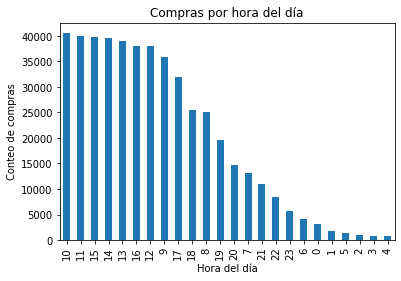

In [37]:
from matplotlib import pyplot as plt
instacart_sin_duplicados['order_hour_of_day'].value_counts().plot(kind='bar')
plt.title('Compras por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Conteo de compras')
plt.show()

Podemos ver que un poco más de 40 mil personas hacen órdenes a las 10am

### [A3] ¿Qué día de la semana compran víveres las personas?

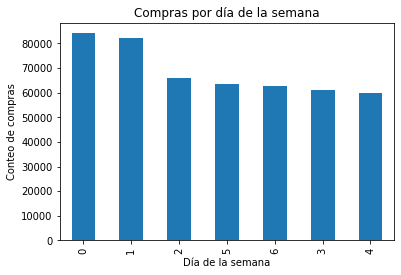

In [38]:
instacart_sin_duplicados['order_dow'].value_counts().plot(kind='bar')
plt.title('Compras por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Conteo de compras')
plt.show()

El domingo es el día que las personas compran más víveres 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

Valor mínimo: 0.0
Valor máximo: 30.0


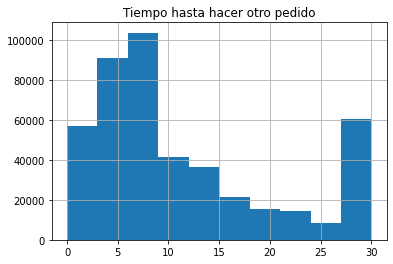

In [39]:
print('Valor mínimo: ' + str(instacart_sin_duplicados['days_since_prior_order'].min()))
print('Valor máximo: ' + str(instacart_sin_duplicados['days_since_prior_order'].max()))
instacart_sin_duplicados['days_since_prior_order'].hist()
plt.title('Tiempo hasta hacer otro pedido')
plt.show()

Las personas esperan hasta 30 días hasta hacer otro pedido

# [B] Intermedio 

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. 

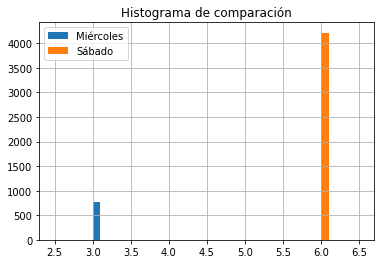

In [40]:
instacart_sin_duplicados.query("order_hour_of_day== 3")['order_hour_of_day'].hist(label='Miércoles')
instacart_sin_duplicados.query("order_hour_of_day== 6")['order_hour_of_day'].hist(label='Sábado')
plt.legend()
plt.title('Histograma de comparación')
plt.show()

Podemos observar que existe una marcada diferencia entre el número de ordenes que se hacen entre los días miércoles y los sábados.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

user_id
152331     1
139876     1
60408      1
139873     1
139871     1
          ..
66664     24
148162    24
78375     25
193164    26
149605    28
Name: order_id, Length: 157437, dtype: int64


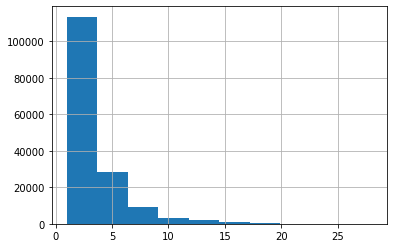

3.042181952145938

In [52]:
print(instacart_sin_duplicados.groupby('user_id')['order_id'].count().sort_values())
instacart_sin_duplicados.groupby('user_id')['order_id'].count().hist()
plt.show()
instacart_sin_duplicados.groupby('user_id')['order_id'].count().mean()

Podemos observar que la mayoría de clientes hace unos 3 pedidos en promedio

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [42]:
nombre_id= pd.merge(order_products, products,on = 'product_id', how='left')
nombre_id.head(20)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,567889,1560,1,1,BAG OF ICE,37,1
2,2261212,26683,1,1,CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...,91,16
3,491251,8670,35,1,DICED TOMATOES,81,15
4,2571142,1940,5,1,ORGANIC 2% REDUCED FAT MILK,84,16
5,2456893,21616,4,1,ORGANIC BABY ARUGULA,123,4
6,644579,12341,5,1,HASS AVOCADOS,32,4
7,2231852,44925,10,1,NATURAL PROVOLONE CHEESE SLICES,21,16
8,3185766,36259,14,1,WHOLE NATURAL VALUE PACK ALMONDS,117,19
9,420019,23315,4,1,ORGANIC COLD BREW COFFEE,26,7


In [43]:
(
    nombre_id.groupby(['product_name', 'product_id'])['order_id']
    .count()
    .reset_index()
    .sort_values(by='order_id',ascending=False)
    .head(20)
)
# nombre_id1[oder_id] = # nombre_id1[numero_de ordenes]

,product_name,product_id,order_id
3252,BANANA,24852,66050
3057,BAG OF ORGANIC BANANAS,13176,53297
28719,ORGANIC STRAWBERRIES,21137,37039
25873,ORGANIC BABY SPINACH,21903,33971
27215,ORGANIC HASS AVOCADO,47209,29773
25839,ORGANIC AVOCADO,47766,24689
20096,LARGE LEMON,47626,21495
38563,STRAWBERRIES,16797,20018
21008,LIMES,26209,19690
29233,ORGANIC WHOLE MILK,27845,19600


Se puede concluir que la banana es el producto más popular 

# [C] Difícil 
1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

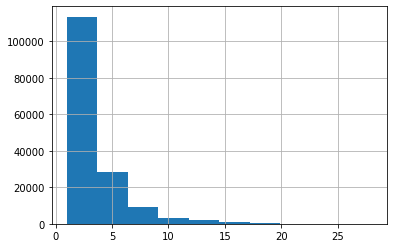

3.042181952145938

In [44]:

instacart_sin_duplicados.groupby('user_id')['order_id'].count().hist(bins=10)

plt.show()
print()
instacart_sin_duplicados.groupby('user_id')['order_id'].count().mean()

Podemos observar que las personas compran en promedio 3 artículos

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [45]:
reordered_order_products_names = pd.merge(order_products.query('reordered == 1'), products, on = 'product_id', how='left')
reordered_order_products_names.head()
products.head()

,product_id,product_name,aisle_id,department_id
0,1,CHOCOLATE SANDWICH COOKIES,61,19
1,2,ALL-SEASONS SALT,104,13
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,94,7
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,38,1
4,5,GREEN CHILE ANYTIME SAUCE,5,13


In [46]:
(
    reordered_order_products_names.groupby('product_name')['order_id']
    .count()
    .reset_index()
    .sort_values(by='order_id', ascending=False)
    .head(20)
)


,product_name,order_id
2484,BANANA,55763
2340,BAG OF ORGANIC BANANAS,44450
22923,ORGANIC STRAWBERRIES,28639
20435,ORGANIC BABY SPINACH,26233
21596,ORGANIC HASS AVOCADO,23629
20406,ORGANIC AVOCADO,18743
23368,ORGANIC WHOLE MILK,16251
15897,LARGE LEMON,15044
22459,ORGANIC RASPBERRIES,14748
30831,STRAWBERRIES,13945


El producto que es 'reordered' o vuelto a pedir con más frecuencia es la banana también 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [47]:
por_producto= order_products.pivot_table(
    index='product_id',
    columns = 'reordered',
    values = 'order_id',
    aggfunc = 'count')
print(por_producto)
por_producto['No_se_vuelve_a_pedir_prop'] = por_producto[0]/(por_producto[0]+por_producto[1])
por_producto['Se_vuelve_a_pedir_prop'] = por_producto[1]/(por_producto[0]+por_producto[1])
por_producto.head()

reordered       0      1
product_id              
1           122.0  158.0
2            11.0    NaN
3            11.0   31.0
4            24.0   25.0
7             1.0    1.0
...           ...    ...
49690         1.0    4.0
49691        41.0   31.0
49692         7.0    5.0
49693        14.0   11.0
49694         6.0    3.0

[45573 rows x 2 columns]


reordered,0,1,No_se_vuelve_a_pedir_prop,Se_vuelve_a_pedir_prop
product_id,,,,
1,122.0,158.0,0.435714,0.564286
2,11.0,NaN,NaN,NaN
3,11.0,31.0,0.261905,0.738095
4,24.0,25.0,0.489796,0.510204
7,1.0,1.0,0.500000,0.500000


En la siguiente tabla pivot podemos observar los productos por id y la proporción en la que se vuelven a pedir o no.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [48]:
por_cliente = pd.merge(order_products, instacart, on = 'order_id', how='left')
por_cliente.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440,17,0,58454,25,0,15,8.0
1,567889,1560,1,1,129474,16,1,13,14.0
2,2261212,26683,1,1,47476,5,6,9,13.0
3,491251,8670,35,1,134505,27,6,13,9.0
4,2571142,1940,5,1,155995,22,5,13,5.0


In [49]:
por_cliente= por_cliente.pivot_table(
    index='user_id',
    columns = 'reordered',
    values = 'order_id',
    aggfunc = 'count')
print(por_cliente)
por_cliente['Ya_los_había_pedido_prop'] = por_cliente[1]/(por_cliente[0]+por_cliente[1])
por_cliente.head(10)

reordered     0     1
user_id              
2          25.0   1.0
4           2.0   NaN
5           4.0   8.0
6           4.0   NaN
7           1.0  13.0
...         ...   ...
206203     21.0   6.0
206206      6.0  15.0
206207      5.0  41.0
206208     38.0  87.0
206209     17.0   8.0

[149626 rows x 2 columns]


reordered,0,1,Ya_los_había_pedido_prop
user_id,,,
2,25.0,1.0,0.038462
4,2.0,NaN,NaN
5,4.0,8.0,0.666667
6,4.0,NaN,NaN
7,1.0,13.0,0.928571
11,12.0,3.0,0.200000
12,9.0,3.0,0.250000
13,10.0,13.0,0.565217
14,39.0,22.0,0.360656


Aquí podemos ver la proporción de los clientes que ya los había pedido

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [50]:
order_products.head(20)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1
6,644579,12341,5,1
7,2231852,44925,10,1
8,3185766,36259,14,1
9,420019,23315,4,1


In [51]:
first_to_order = pd.merge(order_products.query('add_to_cart_order == 1'), products, on = 'product_id', how='left')
first_to_order.head()
first_to_order.groupby(['product_id' , 'product_name'])['order_id'].count().sort_values(ascending=False).head(20)

product_id  product_name               
24852       BANANA                         15562
13176       BAG OF ORGANIC BANANAS         11026
27845       ORGANIC WHOLE MILK              4363
21137       ORGANIC STRAWBERRIES            3946
47209       ORGANIC HASS AVOCADO            3390
21903       ORGANIC BABY SPINACH            3336
47766       ORGANIC AVOCADO                 3044
19660       SPRING WATER                    2336
16797       STRAWBERRIES                    2308
27966       ORGANIC RASPBERRIES             2024
44632       SPARKLING WATER GRAPEFRUIT      1914
49235       ORGANIC HALF & HALF             1797
47626       LARGE LEMON                     1737
196         SODA                            1733
38689       ORGANIC REDUCED FAT MILK        1397
26209       LIMES                           1370
12341       HASS AVOCADOS                   1340
5785        ORGANIC REDUCED FAT 2% MILK     1310
27086       HALF & HALF                     1309
43352       RASPBERRIES      

Nuevamente la banana termina siendo el producto que los clientes más ponen en su carrito en primer lugar 

### Conclusion general del proyecto:

Es interesante poder saber por ejemplo cuáles son los productos más pedidos por los clientes para poder utilizar esa información
para poder redistribuir quizás los pasillos y poner esos productos en el lugar más lejano del supermercado para que asi los clientes
tengan que pasar por todo el supermercado para conseguirlo y así en el camino comprar otras cosas que no necesitan realmente.

Por otro lado saber la proporción de los productos que se reordenan nos da una mejor idea de la demanda de algunos de ellos 
ayudandonos a planear mejor las compras del supermercado y así mejorar la gestión de los almacenes.